# Our objective is to analyze the Data gathered using the streaming API

#### We will amke use of 4 different libraries: 1) json for parsing the data 2) pandas for data manipulation 3) matplotlib for charting the data and 4) re for regular expressions

we need to first set our directory to the specific folder (this is to be changed to fit each situation)

In [1]:
cd Desktop/Python_Final/

C:\Users\Hassan Saadi\Desktop\Python_Final


In [2]:
# we first import the libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

#### we define a function that will first check the data set for text in individual tweets and then within the text it will seasearch for the word specified


In [3]:
# we define a function that will first check the data set for text in individual tweets and then within the text it will seasearch for the word specified
def word_in_text(word, text):
    if text == None:
        return False
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

## Reading Tweets

#### we first import the json file that we collected using the streaming API

In [4]:
# Reading Tweets
# we first import the json file that we collected using the streaming API
print('Reading Tweets\n')
tweets_data_path = "twitter_data.txt"

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print ("The number of tweets collected is " + str(len(tweets_data)))


Reading Tweets

The number of tweets collected is 167704


## Structuring Tweets
#### We utilize pandas DataFrames for this purpose

In [5]:
# Structuring Tweets
#here we make use of pandas to define columns with data from the json file
#we look at the text, language (lang), and country of origin regarding the tweet
print('Structuring Tweets\n')
tweets = pd.DataFrame()

#tweets['YOUR STRING HERE'] = list(map(lambda tweet: tweet.get('YOUR STRING HERE', None),tweets_data))
tweets['text'] = list(map(lambda tweet: tweet.get('text', None),tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet.get('lang', None),tweets_data))
tweets['country'] = list(map(lambda tweet: tweet.get('place',{}).get('country', None) if tweet.get('place') != None else None,tweets_data))

Structuring Tweets



## Analyzing Tweets by Language
#### Here we get the language of each tweet and plot the top 10 using matplotlib

Analyzing tweets by language

The number of languages used: 46


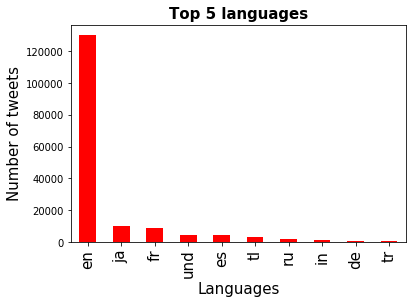

In [6]:
# Analyzing Tweets by Language
#here we get the language of each tweet and plot the top 10
print('Analyzing tweets by language\n')
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:10].plot(ax=ax, kind='bar', color='red')
plt.savefig('tweet_by_lang', format='png')
print( "The number of languages used: " + str(len(tweets_by_lang)))
plt.show()

## Analyzing Tweets by Country
#### Here we do a similar comparison as above but look at the country where the tweet originated (if any) and plot it again using matplotlib

Analyzing tweets by country



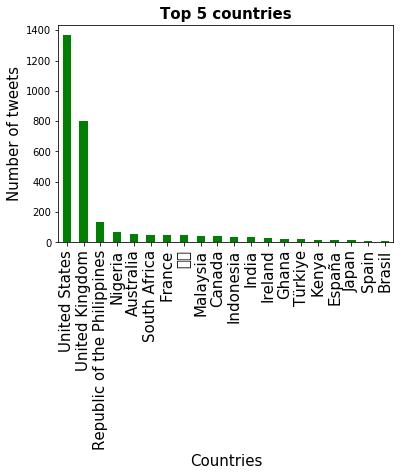

In [7]:
# Analyzing Tweets by Country
#here we do a similar comparison as above but look at the country where the tweet originated (if any)
print('Analyzing tweets by country\n')
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:20].plot(ax=ax, kind='bar', color='green')
plt.savefig('tweet_by_country', format='png')
plt.show()

## Analysis of mentions per tweet for each individual sports

#### now we introduce columns for the specific sport to analyze the mention of each sport and asses how many times the keyword is mentioned

In [8]:
#now we introduce columns for the specific sport to analyze the mention of each sport
print('Analyzing tweets by sports\n')
tweets['basketball'] = tweets['text'].apply(lambda tweet: word_in_text('basketball', tweet))
tweets['soccer'] = tweets['text'].apply(lambda tweet: word_in_text('soccer', tweet))
tweets['football'] = tweets['text'].apply(lambda tweet: word_in_text('football', tweet))

Analyzing tweets by sports



#### The raw mentions of each sport

In [9]:
#Here we have the frequency of each keyword used, in this case the name of the three sports
print("The total number of mention of each respective sport are as follows:")
print('basketball', tweets['basketball'].value_counts()[True])
print("soccer", tweets['soccer'].value_counts()[True])
print("football", tweets['football'].value_counts()[True])

The total number of mention of each respective sport are as follows:
basketball 29044
soccer 17700
football 67411


### The ranking of each respective sport by their names

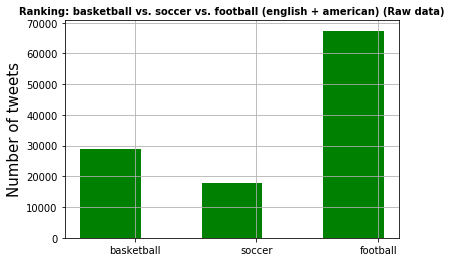

In [10]:
#similar to before, we plot the ranking of each sport respectively
type_sport = ['basketball', 'soccer', 'football']
tweets_by_type_sport = [tweets['basketball'].value_counts()[True], tweets['soccer'].value_counts()[True], tweets['football'].value_counts()[True]]

x_pos = list(range(len(type_sport)))
width = 0.5
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_type_sport, width, alpha=1, color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: basketball vs. soccer vs. football (english + american) (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(type_sport)
plt.grid()
plt.savefig('tweets_by_type_sport_1', format='png')
plt.show()

## Analysis of mentions per tweet for a star individual in their respective sport

#### now we introduce columns for each individual in question and access if the keyword (name) is mentioned in the respective tweet

In [11]:
#No we do a similar comparison but now with a popular name in each respective sport
#first we define columns such that we can check if the givem name is mentioned in a tweet
print('Analyzing tweets by a popular player in each respective sport')
tweets['lebron'] = tweets['text'].apply(lambda tweet: word_in_text('lebron', tweet))
tweets['ronaldo'] = tweets['text'].apply(lambda tweet: word_in_text('ronaldo', tweet))
tweets['brady'] = tweets['text'].apply(lambda tweet: word_in_text('brady', tweet))

Analyzing tweets by a popular player in each respective sport


### The mention of each individual in the data set

In [12]:
#We first look at the mention for each player
print("The total number of mention of each respective player are as follows:")
print('Lebron', tweets['lebron'].value_counts()[True])
print("Ronaldo", tweets['ronaldo'].value_counts()[True])
print("Brady", tweets['brady'].value_counts()[True])

The total number of mention of each respective player are as follows:
Lebron 199
Ronaldo 1934
Brady 51


### The plot for ranking by star player

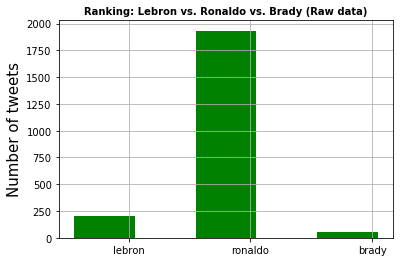

In [13]:
#now we plot the data as before
pop_players = ['lebron', 'ronaldo', 'brady']
tweets_by_pop_players = [tweets['lebron'].value_counts()[True], tweets['ronaldo'].value_counts()[True], tweets['brady'].value_counts()[True]]

x_pos = list(range(len(pop_players)))
width = 0.5
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_pop_players, width, alpha=1, color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Lebron vs. Ronaldo vs. Brady (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(pop_players)
plt.grid()
plt.savefig('tweets_by_pop_players', format='png')
plt.show()